In [1]:
import numpy
import math
import matplotlib.pyplot as plot
#nltk
import nltk
# nltk.download()
from collections import Counter
from nltk import word_tokenize
from nltk.util import ngrams
#textblob
import pandas
from textblob import TextBlob


In [2]:
reddit_df = pandas.read_pickle('redditDataset.pkl')

In [3]:
pandas.read_pickle('redditDataset.pkl')

,text,subreddit
0,that sounds like the answer of a man who does ...,humor
1,i always wonder what people get out of reposti...,humor
2,fuck that downvote them for stalking you in t...,humor
3,seeing as how much this has been around and a...,humor
4,it took me a while to even get my legally requ...,humor
...,...,...
99995,probably because it should nt be anyone else s...,news
99996,of course i do the sole responsibility of the ...,news
99997,its also just unwise if they block his pick lo...,news
99998,another holographic storage for us to hear a...,news


category1
mean_polarity: 0.05231557130778092
std_polarity: 0.24779187241181028

mean_subjectivity: 0.47071756809233806
std_subjectivity: 0.24244049209324797


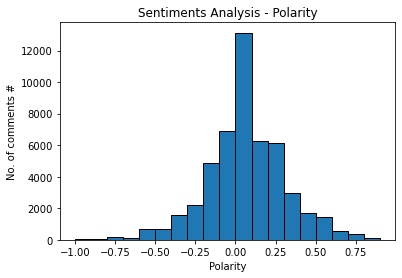

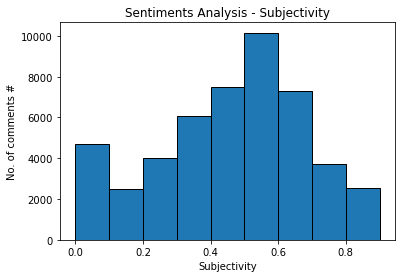

In [4]:
#Q1 - 

#Q1 (a)

#category 1 - humour
L_text = reddit_df.text.loc[reddit_df.subreddit =="humor"].tolist()

polarity = [] # Polarity(float) - lies b/w [-1,1], where "+1" indicates positive sentiments and "-1" indicates negative sentiments
subjectivity = [] # Subjectivity(float) - lies b/w [0,1]. It refers to an opinion or emotion.

for i in range(len(L_text)):
    Sentiment = TextBlob(L_text[i]).sentiment
    polarity.append(Sentiment.polarity)
    subjectivity.append(Sentiment.subjectivity)

print("category1")

mean_polarity = sum(polarity)/len(polarity)
summ = 0
for i in range(len(polarity)):
    summ = summ + pow(polarity[i]- mean_polarity,2)

std_polarity = math.sqrt(summ/len(polarity))

print("mean_polarity: " + str(mean_polarity))
print("std_polarity: " + str(std_polarity))
print()

mean_subjectivity = sum(subjectivity)/len(subjectivity)
summ = 0
for i in range(len(subjectivity)):
    summ = summ + pow(subjectivity[i] - mean_subjectivity,2)

std_subjectivity = math.sqrt(summ/len(subjectivity))

print("mean_subjectivity: "+ str(mean_subjectivity))
print("std_subjectivity: " + str(std_subjectivity))

#plot taking uniform buckets to club the polarity values 
plot.title("Sentiments Analysis - Polarity") 
plot.hist(polarity,bins = numpy.arange(-1,1,0.1),ec='black') #to show separate bins 
plot.ylabel('No. of comments #')
plot.xlabel('Polarity')
plot.show()

#plot taking uniform buckets to club the polarity values 
plot.title("Sentiments Analysis - Subjectivity") 
plot.hist(subjectivity,bins = numpy.arange(0,1,0.1),ec='black') #to show separate bins 
plot.ylabel('No. of comments #')
plot.xlabel('Subjectivity')
plot.show()

category2
mean_polarity: 0.0639129303826589
std_polarity: 0.23032266034830234

mean_subjectivity: 0.4691590125773786
std_subjectivity: 0.23192435303492823


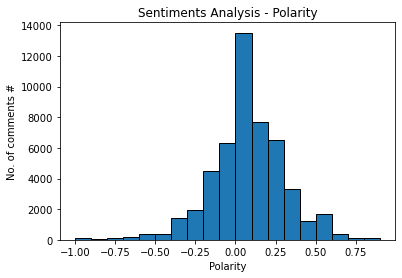

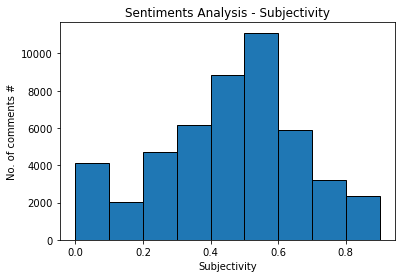

In [5]:
#-----------------------------------------------------------------------------------------------

#category 2 - news
L_text2 = reddit_df.text.loc[reddit_df.subreddit =="news"].tolist()

polarity2 = []
subjectivity2 = []
for i in range(len(L_text2)):
    Sentiment = TextBlob(L_text2[i]).sentiment
    polarity2.append(Sentiment.polarity)
    subjectivity2.append(Sentiment.subjectivity)

print("category2")

mean_polarity2 = sum(polarity2)/len(polarity2)
summ = 0
for i in range(len(polarity2)):
    summ = summ + pow(polarity2[i] - mean_polarity2,2)

std_polarity2 = math.sqrt(summ/len(polarity2))


print("mean_polarity: " + str(mean_polarity2))
print("std_polarity: " + str(std_polarity2))

print()

mean_subjectivity2 = sum(subjectivity2 )/len(subjectivity2)
summ = 0
for i in range(len(subjectivity2)):
    summ = summ + pow(subjectivity2[i]- mean_subjectivity2,2)

std_subjectivity2 = math.sqrt(summ/len(subjectivity2))

print("mean_subjectivity: "+ str(mean_subjectivity2))
print("std_subjectivity: " + str(std_subjectivity2))

#plot taking uniform buckets to club the polarity values 
plot.title("Sentiments Analysis - Polarity") 
plot.hist(polarity2,bins = numpy.arange(-1,1,0.1),ec='black') #to show separate bins 
plot.ylabel('No. of comments #')
plot.xlabel('Polarity')
plot.show()

#plot taking uniform buckets to club the polarity values 
plot.title("Sentiments Analysis - Subjectivity") 
plot.hist(subjectivity2,bins = numpy.arange(0,1,0.1),ec='black') #to show separate bins 
plot.ylabel('No. of comments #')
plot.xlabel('Subjectivity')
plot.show()

category1


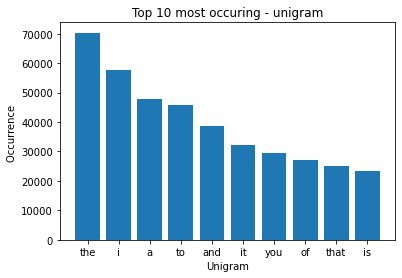

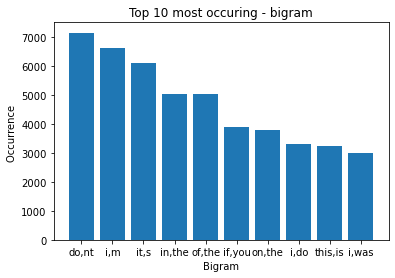

In [672]:
#Q1 (b) 

# Plot distributions of the top 10 most occurring (i) unigrams, (ii) bi-grams
print("category1")

count_unigram = Counter()
count_bigram = Counter()
for i in range(len(L_text)):
    token = nltk.word_tokenize(L_text[i])
    unigram = ngrams(token,1)
    count_unigram += Counter(unigram)
    bigram = ngrams(token,2)
    count_bigram += Counter(bigram)
    
A = count_unigram.most_common(10)  #tuple having text and it's count
B = count_bigram.most_common(10)

A_values = []
A_text = []
B_values = []
B_text = []

for i in range(len(A)):
    A_values.append((A[i][1]))
    B_values.append((B[i][1]))
    A_text.append(str(A[i][0])[2:-3]) #since counter function gives a tuple I'm str slicing from to get string
    B_text.append(str(B[i][0]).replace("(",'').replace(")",'').replace("'",'').replace(" ",''))

# plot taking uniform buckets to club the polarity values 
plot.title("Top 10 most occuring - unigram") 
# plot.hist(A_values,bins = numpy.arange(0,10,0.5),ec='black') #to show separate bins 
plot.bar(A_text,A_values)
plot.ylabel('Occurrence ')
plot.xlabel('Unigram')
plot.show()
print()

# plot taking uniform buckets to club the polarity values 
plot.title("Top 10 most occuring - bigram") 
# plot.hist(A_values,bins = numpy.arange(0,10,0.5),ec='black') #to show separate bins 
plot.bar(B_text,B_values)
plot.ylabel('Occurrence ')
plot.xlabel('Bigram')
plot.show()
print()


category2


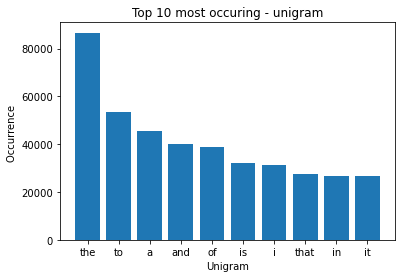

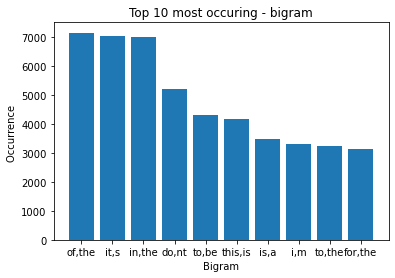

In [7]:
#Q1 (b) 

# Plot distributions of the top 10 most occurring (i) unigrams, (ii) bi-grams
print("category2")
count_unigram = Counter()
count_bigram = Counter()
for i in range(len(L_text2)):
    token = nltk.word_tokenize(L_text2[i])
    unigram = ngrams(token,1)
    count_unigram += Counter(unigram)
    bigram = ngrams(token,2)
    count_bigram += Counter(bigram)
    
A = count_unigram.most_common(10)  #tuple having text and it's count
B = count_bigram.most_common(10)

A_values = []
A_text = []
B_values = []
B_text = []

for i in range(len(A)):
    A_values.append((A[i][1]))
    B_values.append((B[i][1]))
    A_text.append(str(A[i][0])[2:-3]) #since counter function gives a tuple I'm str slicing from to get string
    B_text.append(str(B[i][0]).replace("(",'').replace(")",'').replace("'",'').replace(" ",''))

# plot taking uniform buckets to club the polarity values 
plot.title("Top 10 most occuring - unigram") 
# plot.hist(A_values,bins = numpy.arange(0,10,0.5),ec='black') #to show separate bins 
plot.bar(A_text,A_values)
plot.ylabel('Occurrence ')
plot.xlabel('Unigram')
plot.show()
print()

# plot taking uniform buckets to club the polarity values 
plot.title("Top 10 most occuring - bigram") 
# plot.hist(A_values,bins = numpy.arange(0,10,0.5),ec='black') #to show separate bins 
plot.bar(B_text,B_values)
plot.ylabel('Occurrence ')
plot.xlabel('Bigram')
plot.show()
print()


In [670]:
#Q2 - 
#sklearn
from sklearn.model_selection import train_test_split
# Q2 (a)

# Split the data into train and test in a 70-30 ratio.
text_train, text_test, subreddit_train, subreddit_test = train_test_split(reddit_df, reddit_df.subreddit, test_size=0.3)

# preprocessing the data 
# lowering case and StopWord
# Ignoring punctuation & special character
# Reducing words to their stem (e.g. “play” from “playing”) (Optional)

#in newer version of pandas( > 1) Series object has no str function working
#uncomment below two lines if using lower version of pandas
# L_text = reddit_df.text.loc[reddit_df.subreddit =="humor"].values.str.lower()  
# L_text = L_text.str.replace('[^\w\s]','')

L_text = [i.lower() for i in reddit_df.text.loc[reddit_df.subreddit =="humor"].tolist()]
L_text = [i.replace('[^\w\s]','') for  i in L_text]

# For Building the Bag of Words model to represent text for feature extraction
# tokenize each sentence to words and take all words & counting them to find frequent words
# and label them to Create binary vector of length L(unique words)
# as already did in Q1 having unigram for all comments
A = count_unigram.most_common(10)  #changing counter object to tuple (containing word and token count)
A_values = []
A_text = []
for i in range(len(A)):
    A_values.append((A[i][1]))
    A_text.append(A[i][0])

    
def makebow(L_text):
    BOW = []  #list of binary list(vectors)
    for i in range(len(L_text)):
        row = L_text[i]
        sent_vec = []
        eachrow_tokens = nltk.word_tokenize(row)
        for word in A_text:
            word = str(word)[2:-3]
            if word in eachrow_tokens:
                sent_vec.append(1)
            else:
                sent_vec.append(0)
        BOW.append(sent_vec)
    return BOW

print("Start")
bow = []
bow = makebow(L_text)


Start


              precision    recall  f1-score   support

           0       0.56      0.46      0.50       449
           1       0.67      0.75      0.70       647

    accuracy                           0.63      1096
   macro avg       0.61      0.60      0.60      1096
weighted avg       0.62      0.63      0.62      1096

[[205 244]
 [162 485]]

0 represents  - Humour 
1 represents  - News


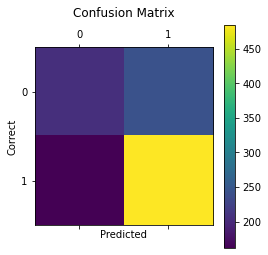

In [668]:
#Using sklearn, train a machine learning model of your choice to classify the comments

# Q2 (b)

# librarires - Models
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#librarires - labelling of data & analysis metrics
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics


# since there are more than 60k duplicate comments in overall 100k 
# It's highly likely that model will give 100% accuracy in that case therfore removing duplicates

dataset = reddit_df.drop_duplicates().copy()     #copy of original dataset
#as for using built in model it uses float not text directly 
dataset.text = LabelEncoder().fit_transform(dataset.text) # thus here use use label encoder to label binary numbers out to category
dataset.subreddit = LabelEncoder().fit_transform(dataset.subreddit) 

#spliting the dataset 70% for training and 30% for testing 
text_train, text_test, subreddit_train, subreddit_test = train_test_split(dataset, dataset.subreddit, test_size=0.3)

# model = LogisticRegression()
# model = RandomForestRegressor()
# model = RandomForestClassifier()
# model = SVC()
model = KNeighborsClassifier()

# training the model 
model.fit(text_train, subreddit_train)

# Q2 (c)

# evaluating the model for predictions
sub_predicted = model.predict(text_test)

# accuracy of predictions by matching predicted and test 
# acc = accuracy_score(subreddit_test, sub_predicted)
# print('Accuracy: %.3f' % acc)

# metrics showing -  precision,accuracy, recall and F1-score. 
print(metrics.classification_report(subreddit_test, sub_predicted))

#assign text label for displaying predicted category
label_predicted = []
for i in range(len(sub_predicted)):
    if sub_predicted[i] == 0:
        label_predicted.append("humor")
    elif sub_predicted[i] == 1:
        label_predicted.append("news")
        
conf_matrix = confusion_matrix(subreddit_test, sub_predicted,labels=[0,1])
print(conf_matrix)

#Plot the confusion matrix to demonstrate my model’s performance.
print("\n0 represents  - Humour \n1 represents  - News")
plot.matshow(conf_matrix)
plot.title('Confusion Matrix\n')
plot.xlabel('Predicted')
plot.ylabel('Correct')

plot.colorbar()
plot.show()


In [333]:
# Section -2
#Q1 (a)
dataframe = pandas.read_csv("Brightkite_totalCheckins.txt",sep="\t")
headers = ["user","check-intime","latitude","longitude","location_id"]
dataframe.columns = headers


In [334]:
unvalid_values = dataframe[(dataframe['longitude'] == 0.0) & (dataframe['latitude'] == 0.0)]
# since the location id at 0.0 are 00000000000 which is not valid id we are removing it
dataframe.drop(unvalid_values.index, inplace = True) 

# to check NA value existence and removing thereafter
if 0 in dataframe.isnull().sum().values:
    dataframe.dropna(inplace=True)

user            0
check-intime    0
latitude        0
longitude       0
location_id     0
dtype: int64


In [373]:
#no.of checkins in decending order
bymostcheckins = dataframe.iloc[dataframe.user.value_counts()]
no_of_checkins = dataframe.iloc[dataframe.user.value_counts()].index.tolist()

#location id by most chekins
# user_id = dataframe3.index.tolist()
location_id = bymostcheckins.location_id.drop_duplicates().tolist()

#checkin time (from past to future)
checkintime_ascending = dataframe.sort_values(by="check-intime",ascending=True)

#user id by most checkins
dataframe2 = dataframe.iloc[dataframe.user.value_counts()]
dataframe2 = dataframe.user.value_counts()
userid =  dataframe2.index.tolist()


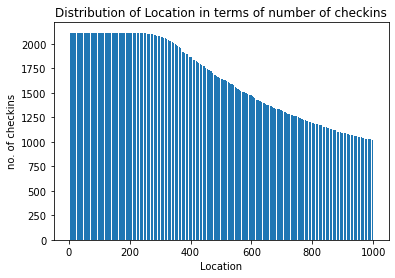

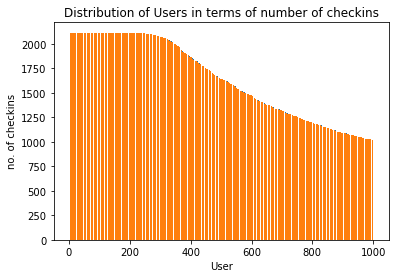

In [387]:
# plot taking uniform buckets to club the polarity values 


# Assumption - not showing x axis label - location id and user id for kth user (as due to overlapping text not visible)
plot.title("Distribution of Location in terms of number of checkins") 
k = 1000
A = location_id[0:k]
B = no_of_checkins[0:k]

# axes = plot.gca()
# axes.set_ylim([0,max(B)])
# # plot.hist(A,bins= numpy.arange(1,k,1),ec="black") #to show separate bins 
# plot.hist(A,k) #to show separate bins 
# plot.ylabel('No. of Checkins #')
# plot.xlabel('Locations')
# plot.xticks(
# rotation=30, 
# horizontalalignment='right',
# )
# plot.show()

plot.bar( list(range(1, k+1)),B)

plot.xlabel('Location')
plot.ylabel('no. of checkins')
plot.show()


##
plot.title("Distribution of Users in terms of number of checkins") 
k = 1000
A = userid[0:k]
B = no_of_checkins[0:k]

# axes = plot.gca()
# axes.set_ylim([0,max(B)])
# plot.hist(A,k, ec="black") #to show separate bins 
# plot.ylabel('No. of Checkins #')
# plot.xlabel('User ID ')
# plot.xticks(
# rotation=30, 
# horizontalalignment='right',
# )
# plot.show()

plot.bar( list(range(1, k+1)),B)
plot.bar(range(len(A)), B)
plot.xlabel('User')
plot.ylabel('no. of checkins')
plot.show()

In [674]:
#Q1 (b)
#plot the check-in locations of users on a geographic heatmap.
import folium
from folium import plugins
from folium.plugins import HeatMap

k = 10000

#default location I found my marking and checking where most points lie.(near Denver,USA)
plotmap = folium.Map(location=[39.7392, -104.9903],zoom_start = 12) #creating fix map image

loc_coordinates = []
for i in range(k): 
    location = [] #taking 1st k latitude and longitude from dataframe
    location.append(dataframe.iloc[i].latitude)
    location.append(dataframe.iloc[i].longitude)
    loc_coordinates.append(location) 
    
L = numpy.array(loc_coordinates) 
Heatmap = plugins.HeatMap(L)
plotmap.add_child(Heatmap)

plotmap
# plotmap.save(outfile= "heatmap.html")


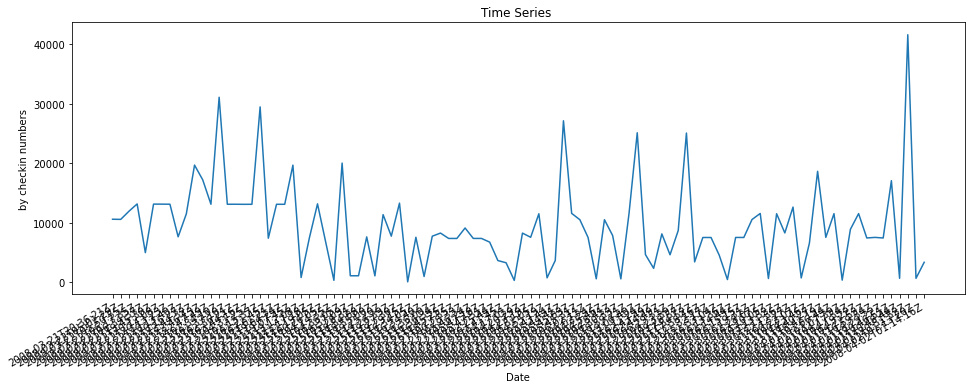

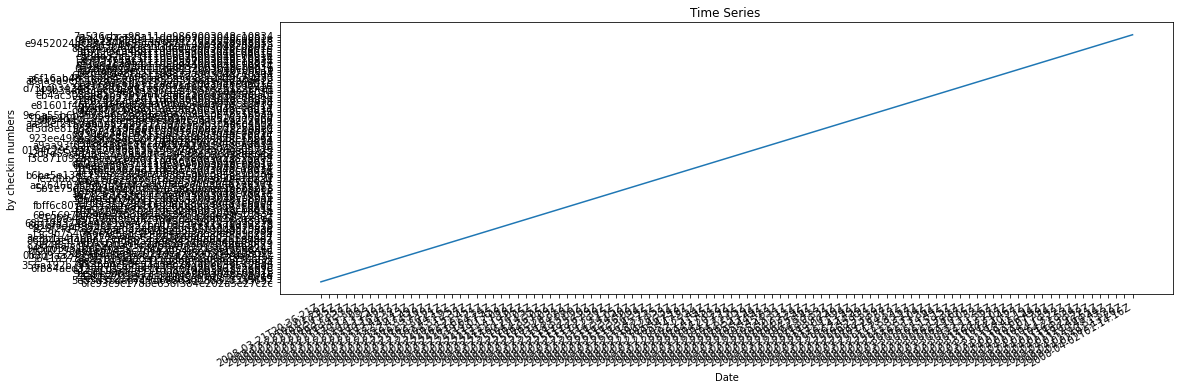

In [375]:
#Q1 (c)
# Make interactive time series plots for
# i. The user with the most number of check-ins
k = 100
A = checkintime_ascending["check-intime"].values.tolist()[0:k]
B = user_id[0:k]

def plot_timeseries(x, y):  # reference taken from https://www.machinelearningplus.com/time-series/time-series-analysis-python/
    plot.figure(figsize=(16,5))
    plot.plot(x, y)
    plot.xticks(
        rotation=30, 
        horizontalalignment='right',
    )
    plot.gca().set(title="Time Series ", xlabel="Date", ylabel="by checkin numbers")
    plot.show()

plot_timeseries(A, B)  


#Q1 (c)
# Make interactive time series plots for
# ii. The location with the most number of check-ins

A = checkintime_ascending["check-intime"].values.tolist()[0:k]
B = location_id[0:k]

plot_timeseries(A, B)   

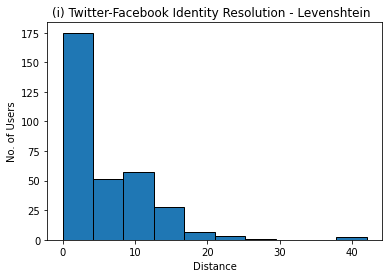

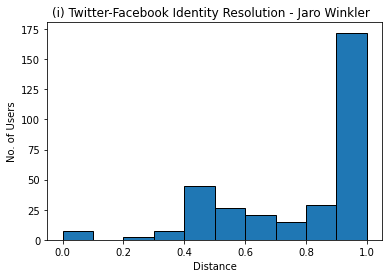

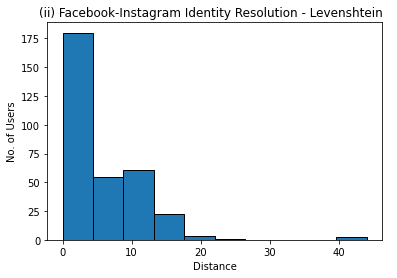

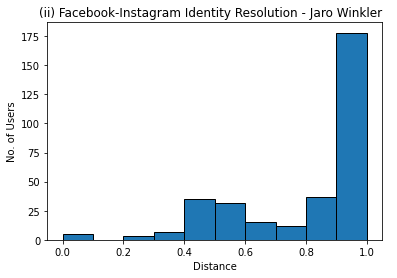

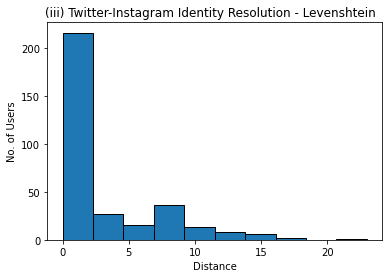

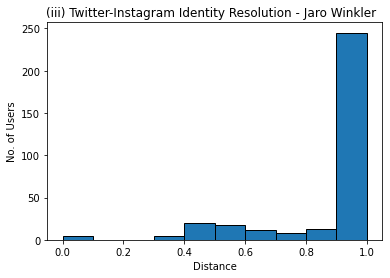

In [669]:
#Section -3 
#Q1 -
import Levenshtein 
from pyjarowinkler import distance

dataframe_users = pandas.read_csv("IdentityResolution.csv",header=None)
headers=["name","twitter","facebook","instagram"]
dataframe_users.columns = headers

twitter_facebook_lev = []
twitter_facebook_jw = []

facebook_instgram_lev = []
facebook_instgram_jw = []

twitter_instgram_lev = []
twitter_instgram_jw = []

for i in range(len(dataframe_users)):
    twitter_name = dataframe_users.twitter[i].split(".com/")[1]
    facebook_name = dataframe_users.facebook[i].split(".com/")[1]
    instgram_name = dataframe_users.instagram[i].split(".com/")[1]
        
    # Levenshtein distance between two words is the minimum number of single-character edits 
    # (insertions, deletions or substitutions) required to change one word into the other.
     #  (i)  Twitter-Facebook Identity Resolution
    lev_dist = Levenshtein.distance(twitter_name,facebook_name)
    
    # Jaro-Winkler computes the similarity between 2 strings, and the returned value lies in the interval [0.0, 1.0]
    # default - (shorter / 2 + 1 ) and winkler paper says - (longer / 2 - 1)
    # 0 represents different strings and 1 represents identical strings.
    jw_dist = distance.get_jaro_distance(twitter_name,facebook_name, winkler=True)
    
    twitter_facebook_lev.append(lev_dist)
    twitter_facebook_jw.append(jw_dist)
    
    # (ii)  Facebook-Instagram Identity Resolution
    lev_dist = Levenshtein.distance(facebook_name,instgram_name)
    jw_dist = distance.get_jaro_distance(facebook_name,instgram_name, winkler=True)
    
    facebook_instgram_lev.append(lev_dist)
    facebook_instgram_jw.append(jw_dist)
    
    # (iii) Twitter-Instagram Identity Resolution
    lev_dist =Levenshtein.distance(twitter_name,instgram_name)    
    jw_dist = distance.get_jaro_distance(twitter_name,instgram_name, winkler=True)
    
    twitter_instgram_lev.append(lev_dist)
    twitter_instgram_jw.append(jw_dist)

plot.title("(i) Twitter-Facebook Identity Resolution - Levenshtein  ")
plot.hist(twitter_facebook_lev,ec='black')
plot.xlabel("Distance")
plot.ylabel("No. of Users")
plot.show()
plot.title("(i) Twitter-Facebook Identity Resolution - Jaro Winkler  ")
plot.hist(twitter_facebook_jw,ec='black')
plot.xlabel("Distance")
plot.ylabel("No. of Users")
plot.show()

plot.title("(ii) Facebook-Instagram Identity Resolution - Levenshtein  ")
plot.hist(facebook_instgram_lev,ec='black')
plot.xlabel("Distance")
plot.ylabel("No. of Users")
plot.show()
plot.title("(ii) Facebook-Instagram Identity Resolution - Jaro Winkler  ")
plot.hist(facebook_instgram_jw,ec='black')
plot.xlabel("Distance")
plot.ylabel("No. of Users")
plot.show()


plot.title("(iii) Twitter-Instagram Identity Resolution - Levenshtein  ")
plot.hist(twitter_instgram_lev,ec='black')
plot.xlabel("Distance")
plot.ylabel("No. of Users")
plot.show()
plot.title("(iii) Twitter-Instagram Identity Resolution - Jaro Winkler  ")
plot.hist(twitter_instgram_jw,ec='black')
plot.xlabel("Distance")
plot.ylabel("No. of Users")
plot.show()